# Data Analysis and Plotting in Python with Pandas

 _Carolin Penke, Jülich Supercomputing Centre, Forschungszentrum Jülich, 23 October 2024_
 _Based on material by Andreas Herten_

**Version: Slides**

## My Motivation
* I like Python
* I like plotting data
* I like sharing
* I think Pandas is awesome and you should use it too
* …_but I'm no Python expert!_

<span style="color: #023d6b"><em>Motto: <strong>»Pandas as early as possible!«</strong></em></span>

## Task Outline

* [Task 1](#task1)
* [Task 2](#task2)
* [Task 3](#task3)
* [Task 4](#task4)
* [Task 5](#task5)
* [Task 6](#task6)
* [Task 7](#task7)
* [Task 7B](#task7b)
* [Task 8](#task8)
* [Task 8B](#task8b)

## Course Setup
* 3½ hours, including break around 10:30
* Alternating between lecture and hands-on
* Please give status of hands-ons via 👍 as BigBlueButton status
* TAs and me in the room can help with issues, either in public chat or in 1:1 chat

* Please now open Jupyter Notebook of this session: https://go.fzj.de/jsc-pd
* Give thumbs up! 👍

## About Pandas

<img style="float: right; max-width: 200px;" width="200px" src="img/adorable-animal-animal-photography-1661535.jpg" />

* Python package
* For data analysis and manipulation
* With data structures (multi-dimensional table; time series), operations
* Name from »**Pan**el **Da**ta« (multi-dimensional time series in economics)
* Since 2008
* Now at Pandas 2.2.3
* https://pandas.pydata.org/
* Install [via PyPI](https://pypi.org/project/pandas/): `pip install pandas`
* *Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf*

## Pandas Cohabitation

* Pandas works great together with other established Python tools
    * [Jupyter Notebooks](https://jupyter.org/)
    * Plotting with [`matplotlib`](https://matplotlib.org/)
    * Numerical analysis with [`numpy`](https://numpy.org/)
    * Modelling with [`statsmodels`](https://www.statsmodels.org/stable/index.html), [`scikit-learn`](https://scikit-learn.org/)
    * Nicer plots with [`seaborn`](https://seaborn.pydata.org/), [`altair`](https://altair-viz.github.io/), [`plotly`](https://plot.ly/)
    * Performance enhancement with [Cython](https://cython.org/), [Numba](numba.pydata.org/), …
* Tools building up on Pandas: [cuDF](https://github.com/rapidsai/cudf) (GPU-accelerated DataFrames in [Rapids](https://rapids.ai/), now as drop-in replacement), [pyarrow](https://arrow.apache.org/docs/python/index.html) (Apache Arrow bindings in Python) …
* Faster alternatives with similar syntax: [Polars](https://pola.rs/), …

## First Steps

In [118]:
import pandas

In [119]:
import pandas as pd

In [120]:
pd.__version__

'2.1.4'

In [121]:
%pdoc pd

## DataFrames
### It's all about DataFrames

<img style="float: right; max-width: 200px;" width="200px" src="img/buzz-dataframes.jpg" />

* Data containers of Pandas:
    - Linear: `Series`
    - Multi Dimension: `DataFrame`
* `Series` is *only* special (1D) case of `DataFrame`
* → We use `DataFrame`s as the more general case here

## DataFrames
### Construction

* To show features of `DataFrame`, let's construct one and show by example!
* Many construction possibilities
    - From lists, dictionaries, `numpy` objects
    - From CSV, HDF5, JSON, Excel, HTML, fixed-width files
    - From pickled Pandas data
    - From clipboard
    - *From Feather, Parquet, SAS, SQL, Google BigQuery, STATA*

## DataFrames

### Examples, finally

In [122]:
ages  = [41, 56, 56, 57, 39, 59, 43, 56, 38, 60]

In [123]:
pd.DataFrame(ages)

0
0  41
1  56
2  56
3  57
4  39
5  59
6  43
7  56
8  38
9  60

In [124]:
df_ages = pd.DataFrame(ages)
df_ages.head(3)

0
0  41
1  56
2  56

* Let's add names to ages; put everything into a `dict()`

In [125]:
data = {
    "Name": ["Liu", "Rowland", "Rivers", "Waters", "Rice", "Fields", "Kerr", "Romero", "Davis", "Hall"],
    "Age": ages
}
print(data)

{'Name': ['Liu', 'Rowland', 'Rivers', 'Waters', 'Rice', 'Fields', 'Kerr', 'Romero', 'Davis', 'Hall'], 'Age': [41, 56, 56, 57, 39, 59, 43, 56, 38, 60]}


In [126]:
df_sample = pd.DataFrame(data)
df_sample.head(4)

Name  Age
0      Liu   41
1  Rowland   56
2   Rivers   56
3   Waters   57

* Automatically creates columns from dictionary
* Two columns now; one for names, one for ages

In [127]:
df_sample.columns

Index(['Name', 'Age'], dtype='object')

* First column is _index_
* `DataFrame` always have indexes; auto-generated or custom

In [128]:
df_sample.index

RangeIndex(start=0, stop=10, step=1)

* Make `Name` be index with `.set_index()`
* `inplace=True` will modifiy the parent frame (*I don't like it*)

In [129]:
df_sample.set_index("Name", inplace=True)
df_sample

Age
Name        
Liu       41
Rowland   56
Rivers    56
Waters    57
Rice      39
Fields    59
Kerr      43
Romero    56
Davis     38
Hall      60

* Some more operations

In [130]:
df_sample.describe()

Age
count  10.000000
mean   50.500000
std     9.009255
min    38.000000
25%    41.500000
50%    56.000000
75%    56.750000
max    60.000000

In [131]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Liu to Hall
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [132]:
df_sample.T

Name  Liu  Rowland  Rivers  Waters  Rice  Fields  Kerr  Romero  Davis  Hall
Age    41       56      56      57    39      59    43      56     38    60

In [133]:
df_sample.T.columns

Index(['Liu', 'Rowland', 'Rivers', 'Waters', 'Rice', 'Fields', 'Kerr',
       'Romero', 'Davis', 'Hall'],
      dtype='object', name='Name')

* Also: Arithmetic operations

In [134]:
df_sample.multiply(2).head(3)

Age
Name        
Liu       82
Rowland  112
Rivers   112

In [135]:
df_sample.reset_index().multiply(2).head(3)

Name  Age
0          LiuLiu   82
1  RowlandRowland  112
2    RiversRivers  112

In [136]:
(df_sample / 2).head(3)

Age
Name         
Liu      20.5
Rowland  28.0
Rivers   28.0

In [137]:
(df_sample * df_sample).head(3)

Age
Name         
Liu      1681
Rowland  3136
Rivers   3136

In [138]:
def mysquare(number: float) -> float:
    return number*number

df_sample.apply(mysquare).head()
# or: df_sample.apply(lambda x: x*x).head()

Age
Name         
Liu      1681
Rowland  3136
Rivers   3136
Waters   3249
Rice     1521

In [139]:
import numpy as np

In [140]:
df_sample.apply(np.square).head()

Age
Name         
Liu      1681
Rowland  3136
Rivers   3136
Waters   3249
Rice     1521

Logical operations allowed as well

In [141]:
df_sample > 40

Age
Name          
Liu       True
Rowland   True
Rivers    True
Waters    True
Rice     False
Fields    True
Kerr      True
Romero    True
Davis    False
Hall      True

In [142]:
df_sample.apply(mysquare).head() == df_sample.apply(lambda x: x*x).head()

Age
Name         
Liu      True
Rowland  True
Rivers   True
Waters   True
Rice     True

## Task 1
<a name="task1"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Create data frame with
    - 6 names of dinosaurs, 
    - their favourite prime number, 
    - and their favorite color.
* Play around with the frame
* Tell me when you're done with status icon in BigBlueButton: 👍

In [143]:
happy_dinos = {
    "Dinosaur Name": [],
    "Favourite Prime": [],
    "Favourite Color": []
}
#df_dinos = 

In [144]:
happy_dinos = {
    "Dinosaur Name": ["Aegyptosaurus", "Tyrannosaurus", "Panoplosaurus", "Isisaurus", "Triceratops", "Velociraptor"],
    "Favourite Prime": ["4", "8", "15", "16", "23", "42"],
    "Favourite Color": ["blue", "white", "blue", "purple", "violet", "gray"]
}
df_dinos = pd.DataFrame(happy_dinos).set_index("Dinosaur Name")
df_dinos.T

Dinosaur Name   Aegyptosaurus Tyrannosaurus Panoplosaurus Isisaurus  \
Favourite Prime             4             8            15        16   
Favourite Color          blue         white          blue    purple   

Dinosaur Name   Triceratops Velociraptor  
Favourite Prime          23           42  
Favourite Color      violet         gray

### More `DataFrame` examples

In [145]:
df_demo = pd.DataFrame({
    "A": 1.2,
    "B": pd.Timestamp('20180226'),
    "C": [(-1)**i * np.sqrt(i) + np.e * (-1)**(i-1) for i in range(5)],
    "D": pd.Categorical(["This", "column", "has", "entries", "entries"]),
    "E": "Same"
})
df_demo

A          B         C        D     E
0  1.2 2018-02-26 -2.718282     This  Same
1  1.2 2018-02-26  1.718282   column  Same
2  1.2 2018-02-26 -1.304068      has  Same
3  1.2 2018-02-26  0.986231  entries  Same
4  1.2 2018-02-26 -0.718282  entries  Same

In [146]:
df_demo.sort_values("C")

A          B         C        D     E
0  1.2 2018-02-26 -2.718282     This  Same
2  1.2 2018-02-26 -1.304068      has  Same
4  1.2 2018-02-26 -0.718282  entries  Same
3  1.2 2018-02-26  0.986231  entries  Same
1  1.2 2018-02-26  1.718282   column  Same

In [147]:
df_demo.round(2).tail(2)

A          B     C        D     E
3  1.2 2018-02-26  0.99  entries  Same
4  1.2 2018-02-26 -0.72  entries  Same

In [148]:
df_demo.round(2)[["A", "C"]].sum()

A    6.00
C   -2.03
dtype: float64

In [149]:
print(df_demo.round(2).to_latex())

\begin{tabular}{lrlrll}
\toprule
 & A & B & C & D & E \\
\midrule
0 & 1.200000 & 2018-02-26 00:00:00 & -2.720000 & This & Same \\
1 & 1.200000 & 2018-02-26 00:00:00 & 1.720000 & column & Same \\
2 & 1.200000 & 2018-02-26 00:00:00 & -1.300000 & has & Same \\
3 & 1.200000 & 2018-02-26 00:00:00 & 0.990000 & entries & Same \\
4 & 1.200000 & 2018-02-26 00:00:00 & -0.720000 & entries & Same \\
\bottomrule
\end{tabular}



## Reading External Data

(Links to documentation)
* [`.read_json()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#pandas.read_json)
* [`.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)
* [`.read_hdf5()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_hdf.html#pandas.read_hdf)
* [`.read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel)

Example:

```json
{
    "Character": ["Sawyer", "…", "Walt"],
    "Actor": ["Josh Holloway", "…", "Malcolm David Kelley"],
    "Main Cast": [true,  "…", false]
}
```

In [150]:
pd.read_json("data-lost.json").set_index("Character").sort_index()

Actor  Main Cast
Character                                 
Hurley             Jorge Garcia       True
Jack                Matthew Fox       True
Kate           Evangeline Lilly       True
Locke             Terry O'Quinn       True
Sawyer            Josh Holloway       True
Walt       Malcolm David Kelley      False

## Task 2
<a name="task2"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Read in `data-nest.csv` to `DataFrame`; call it `df`  
  *(Data was produced with [JUBE](http://www.fz-juelich.de/ias/jsc/EN/Expertise/Support/Software/JUBE/_node.html))*
* Get to know it and play a bit with it
* Tell me when you're done with status icon in BigBlueButton: 👍

In [151]:
!head data-nest.csv

id,Nodes,Tasks/Node,Threads/Task,Runtime Program / s,Scale,Plastic,Avg. Neuron Build Time / s,Min. Edge Build Time / s,Max. Edge Build Time / s,Min. Init. Time / s,Max. Init. Time / s,Presim. Time / s,Sim. Time / s,Virt. Memory (Sum) / kB,Local Spike Counter (Sum),Average Rate (Sum),Number of Neurons,Number of Connections,Min. Delay,Max. Delay
5,1,2,4,420.42,10,true,0.29,88.12,88.18,1.14,1.20,17.26,311.52,46560664.00,825499,7.48,112500,1265738500,1.5,1.5
5,1,4,4,200.84,10,true,0.15,46.03,46.34,0.70,1.01,7.87,142.97,46903088.00,802865,7.03,112500,1265738500,1.5,1.5
5,1,2,8,202.15,10,true,0.28,47.98,48.48,0.70,1.20,7.95,142.81,47699384.00,802865,7.03,112500,1265738500,1.5,1.5
5,1,4,8,89.57,10,true,0.15,20.41,23.21,0.23,3.04,3.19,60.31,46813040.00,821491,7.23,112500,1265738500,1.5,1.5
5,2,2,4,164.16,10,true,0.20,40.03,41.09,0.52,1.58,6.08,114.88,46937216.00,802865,7.03,112500,1265738500,1.5,1.5
5,2,4,4,77.68,10,true,0.13,20.93,21.22,0.16,0.46,3.12,52.05,47362064.00,821491,7.23,112500,1265

In [152]:
df = pd.read_csv("data-nest.csv")
df.head()

id  Nodes  Tasks/Node  Threads/Task  Runtime Program / s  Scale  Plastic  \
0   5      1           2             4               420.42     10     True   
1   5      1           4             4               200.84     10     True   
2   5      1           2             8               202.15     10     True   
3   5      1           4             8                89.57     10     True   
4   5      2           2             4               164.16     10     True   

   Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
0                        0.29                     88.12   
1                        0.15                     46.03   
2                        0.28                     47.98   
3                        0.15                     20.41   
4                        0.20                     40.03   

   Max. Edge Build Time / s  ...  Max. Init. Time / s  Presim. Time / s  \
0                     88.18  ...                 1.20             17.26   
1                     46.34  ...                 1.01              7.87   
2                     48.48  ...                 1.20              7.95   
3                     23.21  ...                 3.04              3.19   
4                     41.09  ...                 1.58              6.08   

   Sim. Time / s  Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  \
0         311.52               46560664.0                     825499   
1         142.97               46903088.0                     802865   
2         142.81               47699384.0                     802865   
3          60.31               46813040.0                     821491   
4         114.88               46937216.0                     802865   

   Average Rate (Sum)  Number of Neurons  Number of Connections  Min. Delay  \
0                7.48             112500             1265738500         1.5   
1                7.03             112500             1265738500         1.5   
2                7.03             112500             1265738500         1.5   
3                7.23             112500             1265738500         1.5   
4                7.03             112500             1265738500         1.5   

   Max. Delay  
0         1.5  
1         1.5  
2         1.5  
3         1.5  
4         1.5  

[5 rows x 21 columns]

## Read CSV Options

* See also full [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* Important parameters
    - `sep`: Set separator (for example `:` instead of `,`)
    - `header`: Specify info about headers for columns; able to use multi-index for columns!
    - `names`: Alternative to `header` – provide your own column titles
    - `usecols`: Don't read whole set of columns, but only these; works with any list (`range(0:20:2)`)…
    - `skiprows`: Don't read in these rows
    - `na_values`: What string(s) to recognize as `N/A` values (which will be ignored during operations on data frame)
    - `parse_dates`: Try to parse dates in CSV; different behaviours as to provided data structure; optionally used together with `date_parser`
    - `compression`: Treat input file as compressed file ("infer", "gzip", "zip", …)
    - `decimal`: Decimal point divider – for German data…
    
```python
pandas.read_csv(filepath_or_buffer, *, sep=_NoDefault.no_default, delimiter=None, header='infer', names=_NoDefault.no_default, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=_NoDefault.no_default, keep_date_col=False, date_parser=_NoDefault.no_default, date_format=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, on_bad_lines='error', delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None, dtype_backend=_NoDefault.no_default)
```

## Slicing of Data Frames

* Slicing: Select a sub-range / sub-set of entire data frame
* Pandas documentation: [Detailed documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html), [short documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection)

### Quick Slices

* Use square-bracket operators to slice data frame quickly: `[]`
    * Use column name to select column
    * Use numerical value to select row
* Example: Select only columnn `C` from `df_demo`

In [153]:
df_demo.head(3)

A          B         C       D     E
0  1.2 2018-02-26 -2.718282    This  Same
1  1.2 2018-02-26  1.718282  column  Same
2  1.2 2018-02-26 -1.304068     has  Same

In [154]:
df_demo['C']

0   -2.718282
1    1.718282
2   -1.304068
3    0.986231
4   -0.718282
Name: C, dtype: float64

* Instead of column name in quotes and square brackets: Name of column _directly_

In [155]:
df_demo.C

0   -2.718282
1    1.718282
2   -1.304068
3    0.986231
4   -0.718282
Name: C, dtype: float64

* I'm not a friend, because no spaces allowed  
  (And **Pandas as early as possible** means labelling columns well and adding spaces)

* Select more than one column by providing `list` to slice operator `[]`
* Example: Select list of columns `A` and `C`, `['A', 'C']` from `df_demo`

In [156]:
my_slice = ['A', 'C']
df_demo[my_slice]

A         C
0  1.2 -2.718282
1  1.2  1.718282
2  1.2 -1.304068
3  1.2  0.986231
4  1.2 -0.718282

* Use numerical values in brackets to slice **along rows**
* Use ranges just like with Python lists

In [157]:
df_demo[1:3]

A          B         C       D     E
1  1.2 2018-02-26  1.718282  column  Same
2  1.2 2018-02-26 -1.304068     has  Same

In [158]:
df_demo[1:6:2]

A          B         C        D     E
1  1.2 2018-02-26  1.718282   column  Same
3  1.2 2018-02-26  0.986231  entries  Same

* Attention: location might change after re-sorting!

In [159]:
df_demo[1:3]

A          B         C       D     E
1  1.2 2018-02-26  1.718282  column  Same
2  1.2 2018-02-26 -1.304068     has  Same

In [160]:
df_demo.sort_values("C")[1:3]

A          B         C        D     E
2  1.2 2018-02-26 -1.304068      has  Same
4  1.2 2018-02-26 -0.718282  entries  Same

## Slicing of Data Frames

### Better Slicing

* `.iloc[]` and `.loc[]`: Faster slicing interfaces with more options

In [161]:
df_demo.iloc[1:3]

A          B         C       D     E
1  1.2 2018-02-26  1.718282  column  Same
2  1.2 2018-02-26 -1.304068     has  Same

* Also slice along columns (second argument)

In [162]:
df_demo.iloc[1:3, [0, 2]]

A         C
1  1.2  1.718282
2  1.2 -1.304068

* `.iloc[]`: Slice by **position** (_numerical/integer_)
* `.loc[]`: Slice by **label** (_named_)
* See difference with a *proper* index (and not the auto-generated default index from before)

In [163]:
df_demo_indexed = df_demo.set_index("D")
df_demo_indexed

A          B         C     E
D                                      
This     1.2 2018-02-26 -2.718282  Same
column   1.2 2018-02-26  1.718282  Same
has      1.2 2018-02-26 -1.304068  Same
entries  1.2 2018-02-26  0.986231  Same
entries  1.2 2018-02-26 -0.718282  Same

In [164]:
df_demo_indexed.loc["entries"]

A          B         C     E
D                                      
entries  1.2 2018-02-26  0.986231  Same
entries  1.2 2018-02-26 -0.718282  Same

In [165]:
df_demo_indexed.loc[["has", "entries"], ["A", "C"]]

A         C
D                     
has      1.2 -1.304068
entries  1.2  0.986231
entries  1.2 -0.718282

## Slicing of Data Frames
### Advanced Slicing: Logical Slicing

* Slice can also be array of booleans

In [166]:
df_demo[df_demo["C"] > 0]

A          B         C        D     E
1  1.2 2018-02-26  1.718282   column  Same
3  1.2 2018-02-26  0.986231  entries  Same

In [167]:
df_demo["C"] > 0

0    False
1     True
2    False
3     True
4    False
Name: C, dtype: bool

In [168]:
df_demo[(df_demo["C"] < 0) & (df_demo["D"] == "entries")]

A          B         C        D     E
4  1.2 2018-02-26 -0.718282  entries  Same

## Adding to Existing Data Frame

* Add new columns with `frame["new col"] = something` or `.insert()`
* Combine data frames
    - *Concat*: Combine several data frames along an axis
    - *Merge*: Combine data frames on basis of common columns; database-style
    - (Join)
    - See user guide [on merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [169]:
df_demo.head(3)

A          B         C       D     E
0  1.2 2018-02-26 -2.718282    This  Same
1  1.2 2018-02-26  1.718282  column  Same
2  1.2 2018-02-26 -1.304068     has  Same

In [170]:
df_demo["F"] = df_demo["C"] - df_demo["A"]
df_demo.head(3)

A          B         C       D     E         F
0  1.2 2018-02-26 -2.718282    This  Same -3.918282
1  1.2 2018-02-26  1.718282  column  Same  0.518282
2  1.2 2018-02-26 -1.304068     has  Same -2.504068

* `.insert()` allows to specify position of insertion
* `.shape` gives tuple of size of data frame, `vertical, horizontal`

In [171]:
df_demo.insert(df_demo.shape[1] - 1, "E2", df_demo["C"] ** 2)
df_demo.head(3)

A          B         C       D     E        E2         F
0  1.2 2018-02-26 -2.718282    This  Same  7.389056 -3.918282
1  1.2 2018-02-26  1.718282  column  Same  2.952492  0.518282
2  1.2 2018-02-26 -1.304068     has  Same  1.700594 -2.504068

In [172]:
df_demo.tail(3)

A          B         C        D     E        E2         F
2  1.2 2018-02-26 -1.304068      has  Same  1.700594 -2.504068
3  1.2 2018-02-26  0.986231  entries  Same  0.972652 -0.213769
4  1.2 2018-02-26 -0.718282  entries  Same  0.515929 -1.918282

## Combining Frames

* First, create some simpler data frame to show `.concat()` and `.merge()`

In [173]:
df_1 = pd.DataFrame({"Key": ["First", "Second"], "Value": [1, 1]})
df_1

Key  Value
0   First      1
1  Second      1

In [174]:
df_2 = pd.DataFrame({"Key": ["First", "Second"], "Value": [2, 2]})
df_2

Key  Value
0   First      2
1  Second      2

* Concatenate list of data frame vertically (`axis=0`)

In [175]:
pd.concat([df_1, df_2])

Key  Value
0   First      1
1  Second      1
0   First      2
1  Second      2

* Same, but re-index

In [176]:
pd.concat([df_1, df_2], ignore_index=True)

Key  Value
0   First      1
1  Second      1
2   First      2
3  Second      2

* Concat, but horizontally

In [177]:
pd.concat([df_1, df_2], axis=1)

Key  Value     Key  Value
0   First      1   First      2
1  Second      1  Second      2

* Merge on common column

In [178]:
pd.merge(df_1, df_2, on="Key")

Key  Value_x  Value_y
0   First        1        2
1  Second        1        2

`.concat()` can also be used to append rows to a DataFrame:

In [179]:
pd.concat(
    [
        df_demo, 
        pd.DataFrame({"A": 1.3, "B": pd.Timestamp("2018-02-27"), "C": -0.777, "D": "has it?", "E": "Same", "F": 23}, index=[0])
    ], ignore_index=True
)

A          B         C        D     E        E2          F
0  1.2 2018-02-26 -2.718282     This  Same  7.389056  -3.918282
1  1.2 2018-02-26  1.718282   column  Same  2.952492   0.518282
2  1.2 2018-02-26 -1.304068      has  Same  1.700594  -2.504068
3  1.2 2018-02-26  0.986231  entries  Same  0.972652  -0.213769
4  1.2 2018-02-26 -0.718282  entries  Same  0.515929  -1.918282
5  1.3 2018-02-27 -0.777000  has it?  Same       NaN  23.000000

## Task 3
<a name="task3"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Add a column to the Nest data frame form Task 2 called `Threads` which is the total number of threads across all nodes (i.e. the product of threads per task and tasks per node and nodes)
* Tell me when you're done with status icon in BigBlueButton: 👍

In [180]:
df["Threads"] = df["Nodes"] * df["Tasks/Node"] * df["Threads/Task"]
df.head()

id  Nodes  Tasks/Node  Threads/Task  Runtime Program / s  Scale  Plastic  \
0   5      1           2             4               420.42     10     True   
1   5      1           4             4               200.84     10     True   
2   5      1           2             8               202.15     10     True   
3   5      1           4             8                89.57     10     True   
4   5      2           2             4               164.16     10     True   

   Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
0                        0.29                     88.12   
1                        0.15                     46.03   
2                        0.28                     47.98   
3                        0.15                     20.41   
4                        0.20                     40.03   

   Max. Edge Build Time / s  ...  Presim. Time / s  Sim. Time / s  \
0                     88.18  ...             17.26         311.52   
1                     46.34  ...              7.87         142.97   
2                     48.48  ...              7.95         142.81   
3                     23.21  ...              3.19          60.31   
4                     41.09  ...              6.08         114.88   

   Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  Average Rate (Sum)  \
0               46560664.0                     825499                7.48   
1               46903088.0                     802865                7.03   
2               47699384.0                     802865                7.03   
3               46813040.0                     821491                7.23   
4               46937216.0                     802865                7.03   

   Number of Neurons  Number of Connections  Min. Delay  Max. Delay  Threads  
0             112500             1265738500         1.5         1.5        8  
1             112500             1265738500         1.5         1.5       16  
2             112500             1265738500         1.5         1.5       16  
3             112500             1265738500         1.5         1.5       32  
4             112500             1265738500         1.5         1.5       16  

[5 rows x 22 columns]

In [181]:
df.columns

Index(['id', 'Nodes', 'Tasks/Node', 'Threads/Task', 'Runtime Program / s',
       'Scale', 'Plastic', 'Avg. Neuron Build Time / s',
       'Min. Edge Build Time / s', 'Max. Edge Build Time / s',
       'Min. Init. Time / s', 'Max. Init. Time / s', 'Presim. Time / s',
       'Sim. Time / s', 'Virt. Memory (Sum) / kB', 'Local Spike Counter (Sum)',
       'Average Rate (Sum)', 'Number of Neurons', 'Number of Connections',
       'Min. Delay', 'Max. Delay', 'Threads'],
      dtype='object')

## Aside: Plotting without Pandas

### Matplotlib 101

* Matplotlib: de-facto standard for plotting in Python
* Main interface: `pyplot`; provides MATLAB-like interface
* Better: Use object-oriented API with `Figure` and `Axis`
* Great integration into Jupyter Notebooks
* Since v. 3: Only support for Python 3
* → https://matplotlib.org/

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_106956/3587136147.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel("$\sqrt{x}$");


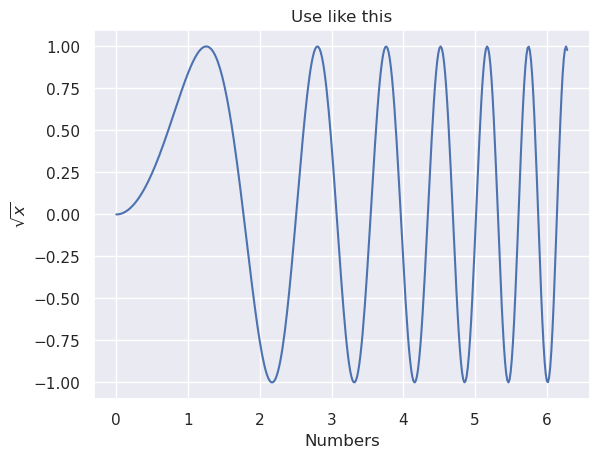

In [184]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Use like this')
ax.set_xlabel("Numbers");
ax.set_ylabel("$\sqrt{x}$");

* Plot multiple lines into one canvas
* Call `ax.plot()` multiple times

In [185]:
y2 = y/np.exp(y*1.5)

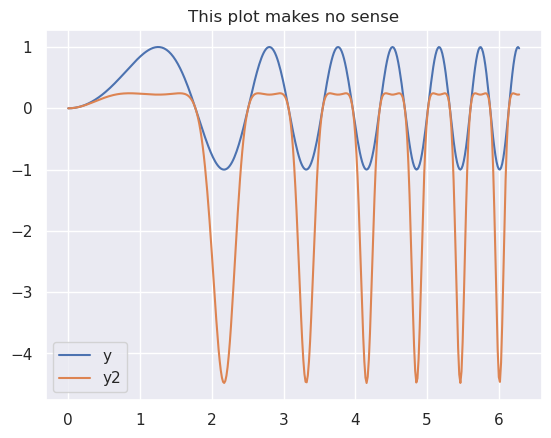

In [186]:
fig, ax = plt.subplots()
ax.plot(x, y, label="y")
ax.plot(x, y2, label="y2")
ax.legend()
ax.set_title("This plot makes no sense");

* Matplotlib can also plot DataFrame data
* Because DataFrame data is _only_ array-like data with stuff on top

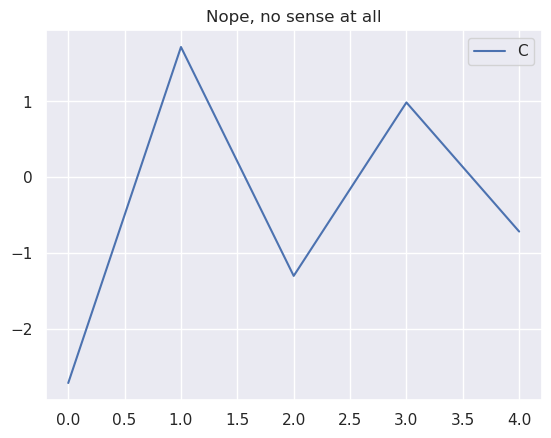

In [187]:
fig, ax = plt.subplots()
ax.plot(df_demo.index, df_demo["C"], label="C")
ax.legend()
ax.set_title("Nope, no sense at all");

## Task 4
<a name="task4"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>


* Sort the Nest data frame by threads
* Plot `"Presim. Time / s"` and `"Sim. Time / s"` of our data frame `df` as a function of threads
* Use a dashed, red line for `"Presim. Time / s"`, a blue line for `"Sim. Time / s"` (see [API description](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot))
* Don't forget to label your axes and to add a legend _(1st rule of plotting)_
* Tell me when you're done with status icon in BigBlueButton: 👍

In [188]:
df.sort_values(["Threads", "Nodes", "Tasks/Node", "Threads/Task"], inplace=True)  # multi-level sort

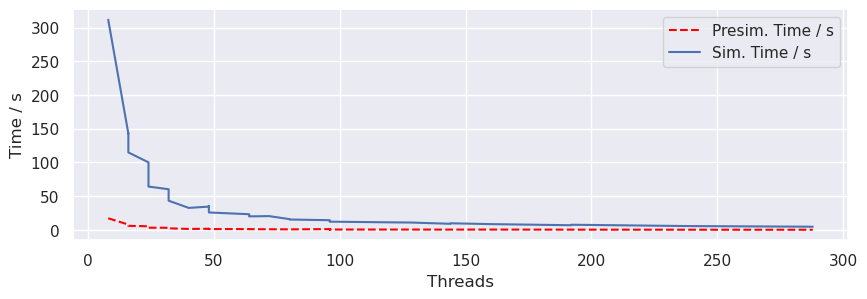

In [189]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(df["Threads"], df["Presim. Time / s"], linestyle="dashed", color="red", label="Presim. Time / s")
ax.plot(df["Threads"], df["Sim. Time / s"], "-b", label="Sim. Time / s")
ax.set_xlabel("Threads")
ax.set_ylabel("Time / s")
ax.legend(loc='best');

## Plotting with Pandas

* Each data frame has a `.plot()` function (see [API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html))
* Plots with Matplotlib
* Important API options:
    - `kind`: `'line'` (default), `'bar[h]'`, `'hist'`, `'box'`, `'kde'`, `'scatter'`, `'hexbin'`
    - `subplots`: Make a sub-plot for each column (good together with `sharex`, `sharey`)
    - `figsize`
    - `grid`: Add a grid to plot (use Matplotlib options)
    - `style`: Line style per column (accepts list or dict)
    - `logx`, `logy`, `loglog`: Logarithmic plots
    - `xticks`, `yticks`: Use values for ticks
    - `xlim`, `ylim`: Limits of axes
    - `yerr`, `xerr`: Add uncertainty to data points
    - `stacked`: Stack a bar plot
    - `secondary_y`: Use a secondary `y` axis for this plot
    - Labeling
        * `title`: Add title to plot (Use a list of strings if `subplots=True`)
        * `legend`: Add a legend
        * `table`: If `true`, add table of data under plot
    - `**kwds`: Non-parsed keyword passed to Matplotlib's plotting methods

* Either slice and plot…

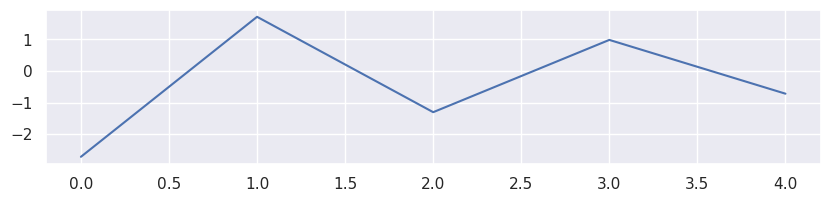

In [190]:
df_demo["C"].plot(figsize=(10, 2));

* … or plot and select

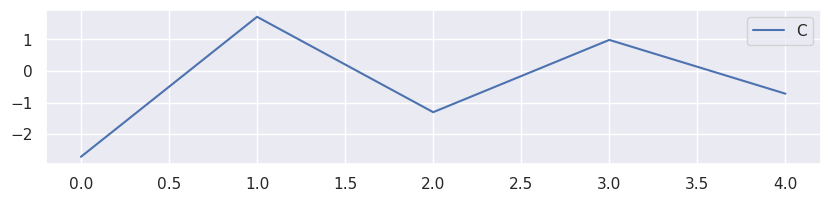

In [191]:
df_demo.plot(y="C", figsize=(10, 2));

* I prefer slicing first:  
  → Allows for further operations on the sliced data frame

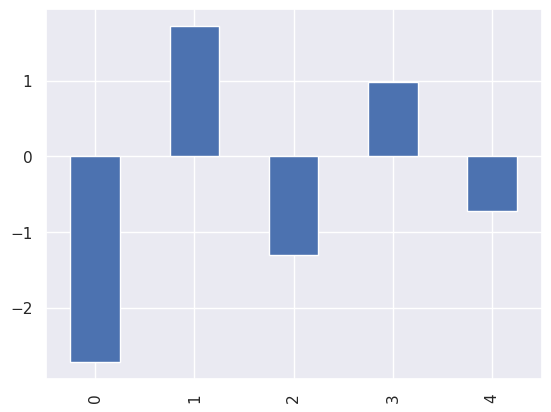

In [192]:
df_demo["C"].plot(kind="bar");

* There are pseudo-sub-functions for each of the plot `kind`s
* I prefer to just call `.plot(kind="smthng")`

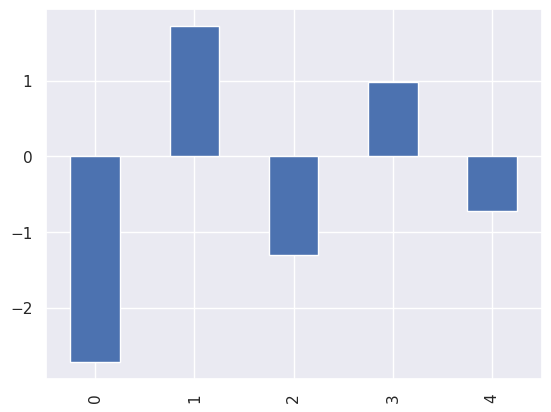

In [193]:
df_demo["C"].plot.bar();

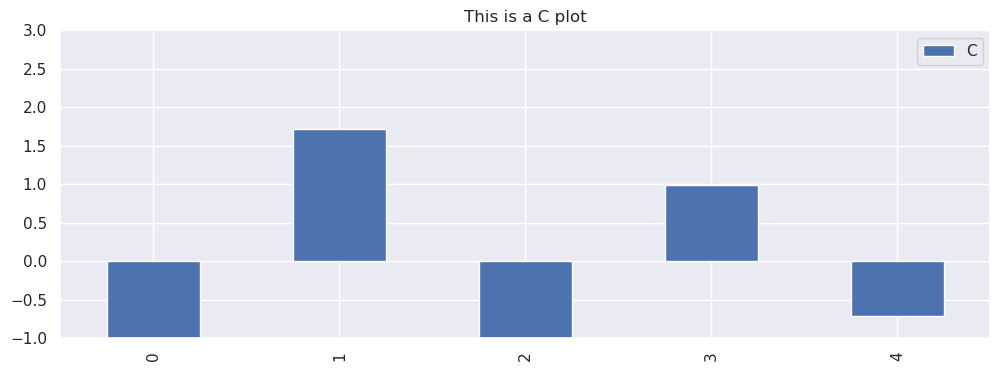

In [194]:
df_demo["C"].plot(kind="bar", legend=True, figsize=(12, 4), ylim=(-1, 3), title="This is a C plot");

## Task 5
<a name="task5"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

Use the Nest data frame `df` to:

1. Make threads index of the data frame (`.set_index()`)
2. Plot `"Presim. Time / s"` and `"Sim. Time / s`" individually
3. Plot them onto one common canvas!
4. Make them have the same line colors and styles as before
5. Add a legend, add missing axes labels
6. Tell me when you're done with status icon in BigBlueButton: 👍

In [195]:
df.set_index("Threads", inplace=True)

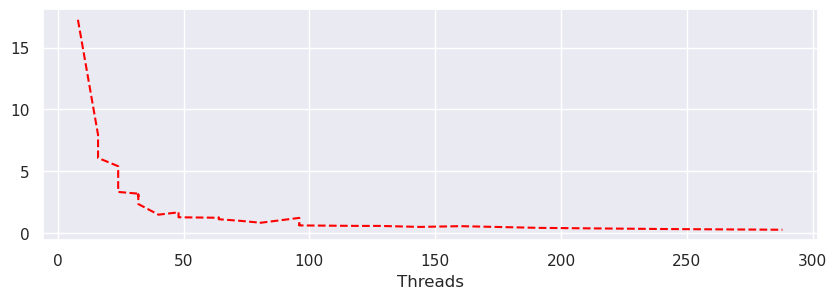

In [196]:
df["Presim. Time / s"].plot(figsize=(10, 3), style="--", color="red");

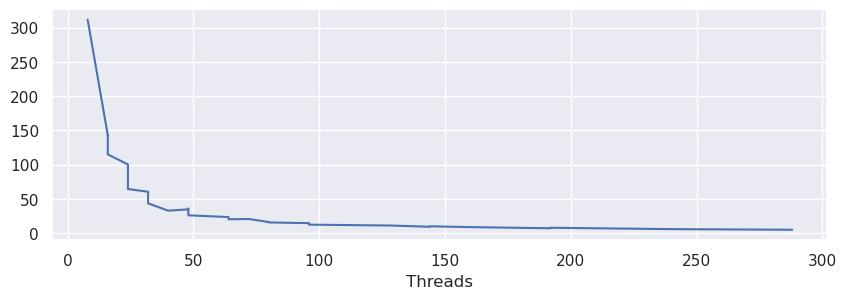

In [197]:
df["Sim. Time / s"].plot(figsize=(10, 3), style="-b");

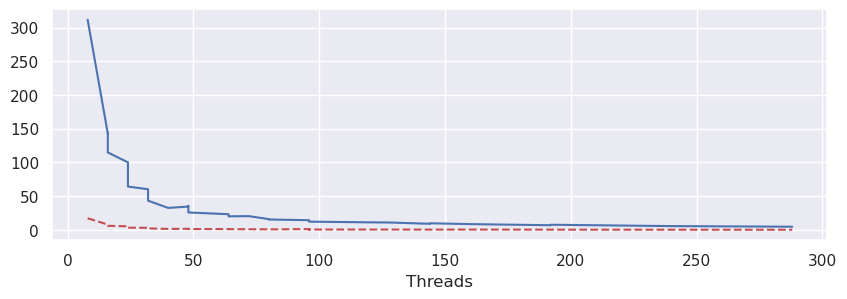

In [198]:
df["Presim. Time / s"].plot(style="--r", figsize=(10,3));
df["Sim. Time / s"].plot(style="-b", figsize=(10,3));

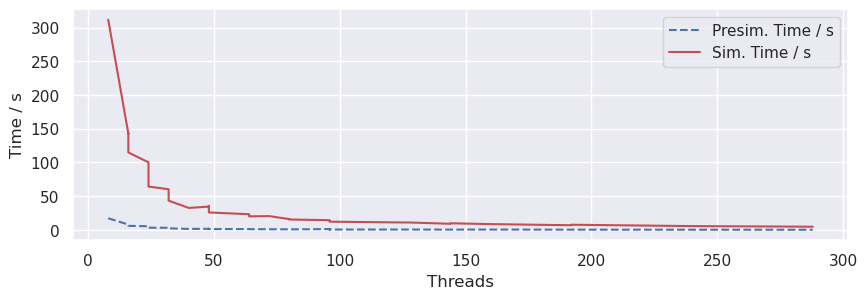

In [199]:
ax = df[["Presim. Time / s", "Sim. Time / s"]].plot(style=["--b", "-r"], figsize=(10,3));
ax.set_ylabel("Time / s");

## More Plotting with Pandas
### Recap: Our first proper Pandas plot


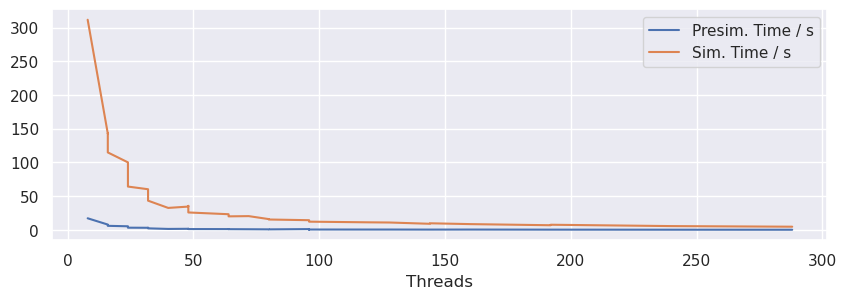

In [200]:
df[["Presim. Time / s", "Sim. Time / s"]].plot(figsize=(10,3));

* **That's why I think Pandas is great!**
* It has great defaults to quickly plot data; basically publication-grade already
* Plotting functionality is very versatile
* Before plotting, data can be *massaged* within data frames, if needed

## More Plotting with Pandas
### Some versatility

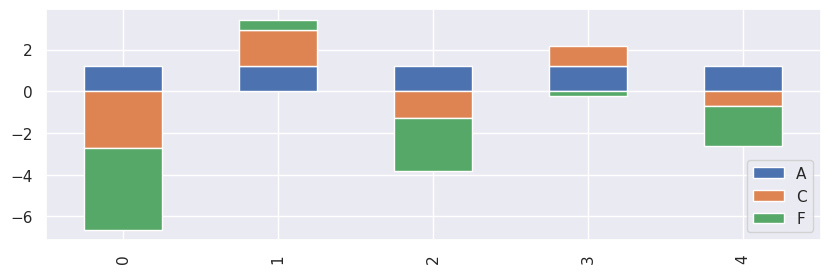

In [201]:
df_demo[["A", "C", "F"]].plot(kind="bar", stacked=True, figsize=(10,3));

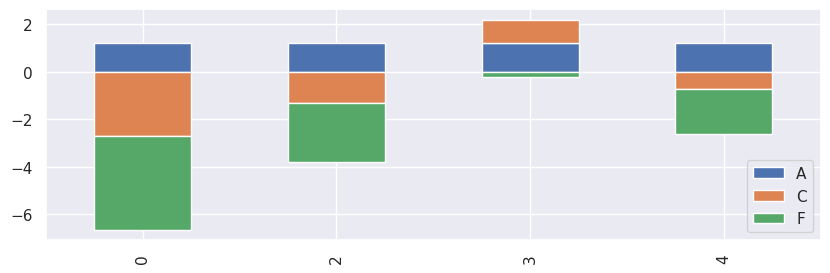

In [202]:
df_demo[df_demo["F"] < 0][["A", "C", "F"]].plot(kind="bar", stacked=True, figsize=(10,3));

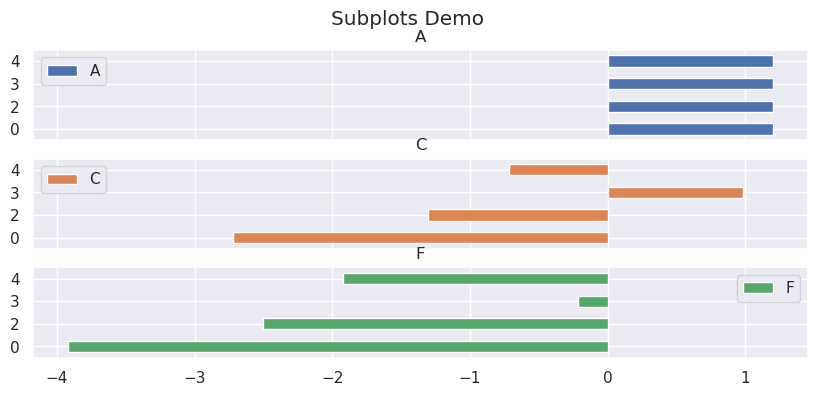

In [203]:
df_demo[df_demo["F"] < 0][["A", "C", "F"]]\
    .plot(kind="barh", subplots=True, sharex=True, title="Subplots Demo", figsize=(10, 4));

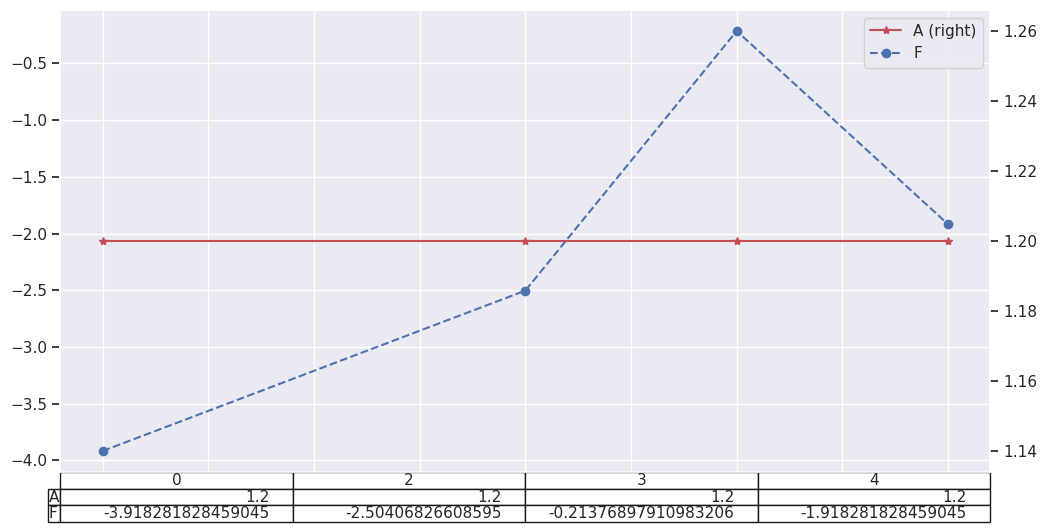

In [204]:
df_demo.loc[df_demo["F"] < 0, ["A", "F"]]\
    .plot(
        style=["-*r", "--ob"], 
        secondary_y="A", 
        figsize=(12, 6),
        table=True
    );

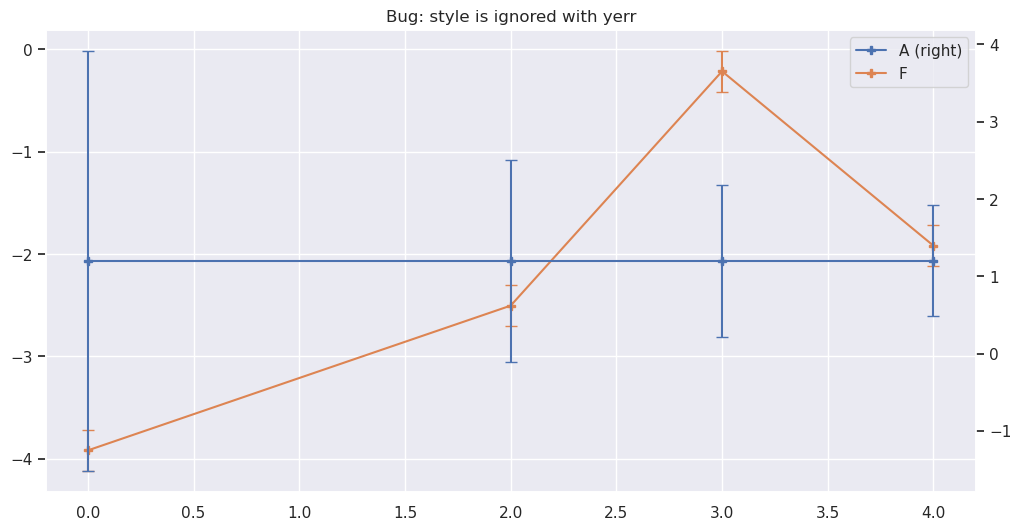

In [205]:
df_demo.loc[df_demo["F"] < 0, ["A", "F"]]\
    .plot(
        style=["-*r", "--ob"], 
        secondary_y="A", 
        figsize=(12, 6),
        yerr={
            "A": abs(df_demo[df_demo["F"] < 0]["C"]), 
            "F": 0.2
        }, 
        capsize=4,
        title="Bug: style is ignored with yerr",
        marker="P"
    );  

## Combine Pandas with Matplotlib

* Pandas shortcuts very handy
* But sometimes, one needs to access underlying Matplotlib functionality
* No problemo!
* **Option 1**: Pandas always returns axis
    - Use this to manipulate the canvas
    - Get underlying `figure` with `ax.get_figure()` (for `fig.savefig()`)
* **Option 2**: Create figure and axes with Matplotlib, use when drawing
    - `.plot()`: Use `ax` option

### Option 1: Pandas Returns Axis

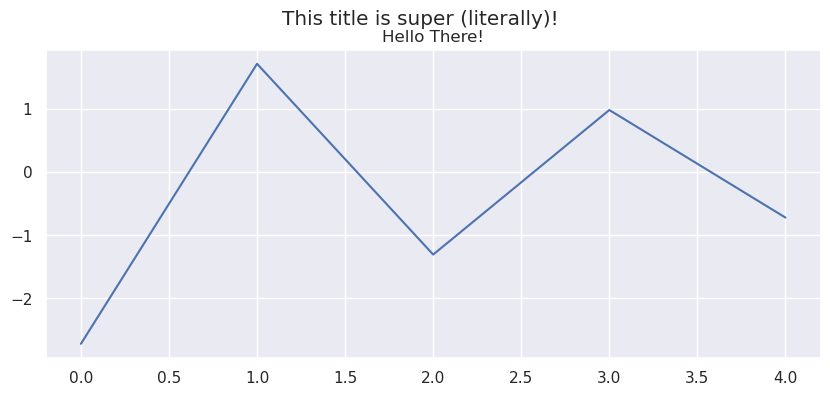

In [206]:
ax = df_demo["C"].plot(figsize=(10, 4))
ax.set_title("Hello There!");
fig = ax.get_figure()
fig.suptitle("This title is super (literally)!");

### Option 2: Draw on Matplotlib Axes

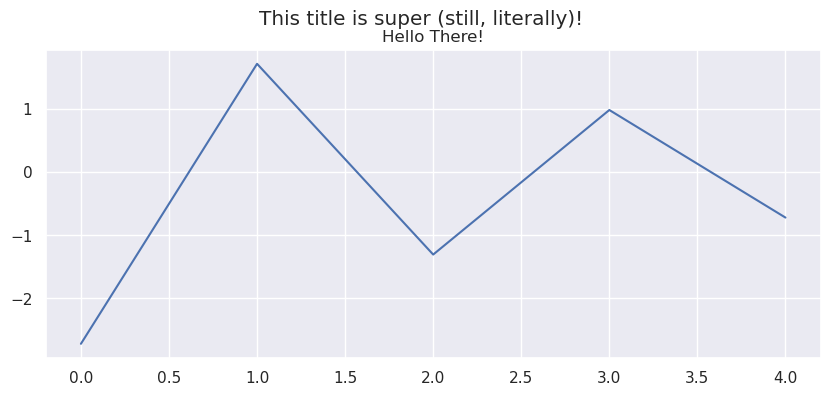

In [207]:
fig, ax = plt.subplots(figsize=(10, 4))
df_demo["C"].plot(ax=ax)
ax.set_title("Hello There!");
fig.suptitle("This title is super (still, literally)!");

* We can also get fancy!

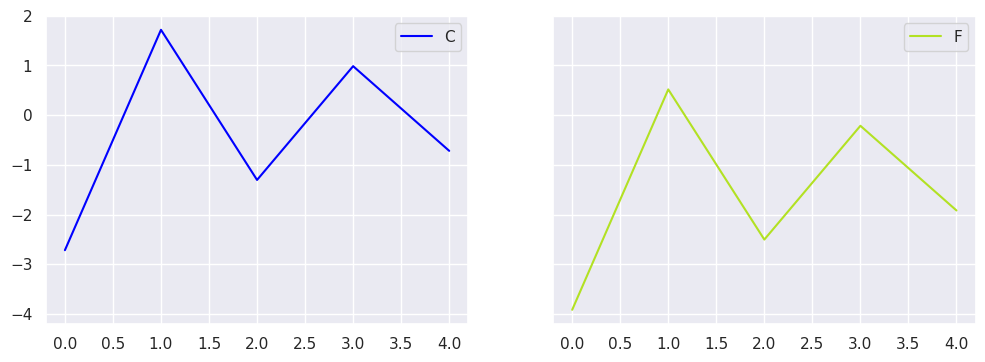

In [208]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 4))
for ax, column, color in zip([ax1, ax2], ["C", "F"], ["blue", "#b2e123"]):
    df_demo[column].plot(ax=ax, legend=True, color=color)

## Aside: Seaborn

* Python package on top of Matplotlib
* Powerful API shortcuts for plotting of statistical data
* Manipulate color palettes
* Works well together with Pandas
* Also: New, well-looking defaults for Matplotlib (IMHO)
* → https://seaborn.pydata.org/

In [209]:
import seaborn as sns
sns.set_theme()  # set defaults

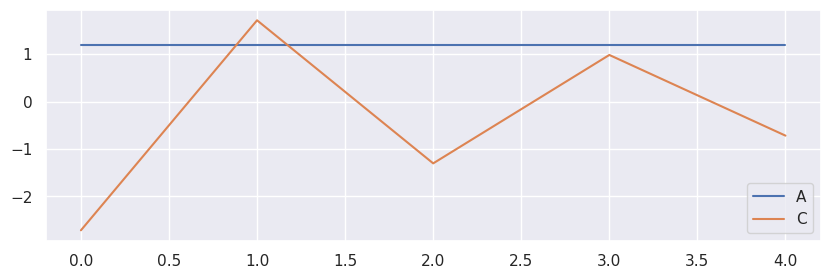

In [210]:
df_demo[["A", "C"]].plot(figsize=(10,3));

### Seaborn Color Palette Example

* [Documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

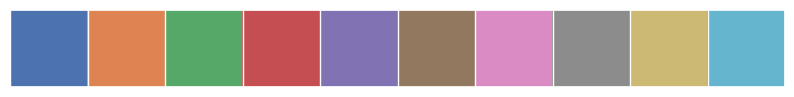

In [211]:
sns.palplot(sns.color_palette())

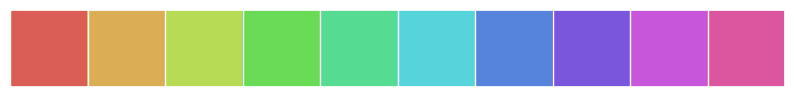

In [212]:
sns.palplot(sns.color_palette("hls", 10))

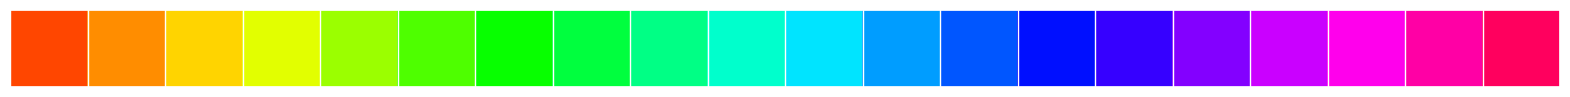

In [213]:
sns.palplot(sns.color_palette("hsv", 20))

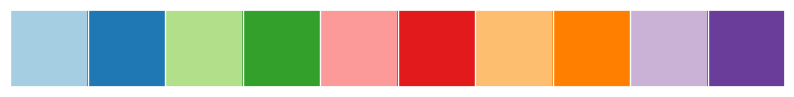

In [214]:
sns.palplot(sns.color_palette("Paired", 10))

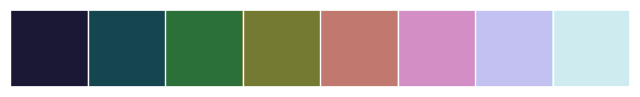

In [215]:
sns.palplot(sns.color_palette("cubehelix", 8))

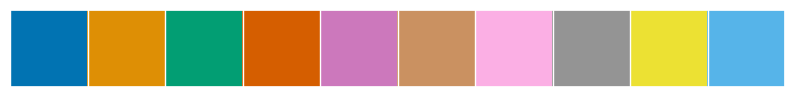

In [216]:
sns.palplot(sns.color_palette("colorblind", 10))

### Seaborn Plot Examples

* Most of the time, I use a regression plot from Seaborn

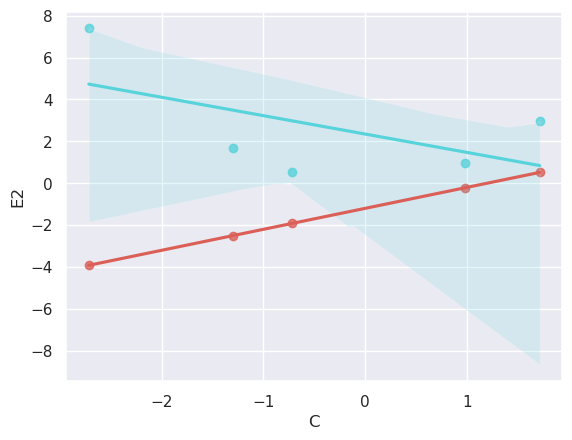

In [217]:
with sns.color_palette("hls", 2):
    sns.regplot(x="C", y="F", data=df_demo);
    sns.regplot(x="C", y="E2", data=df_demo);

* A *joint plot* combines two plots relating to distribution of values into one
* Very handy for showing a fuller picture of two-dimensionally scattered variables

In [218]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

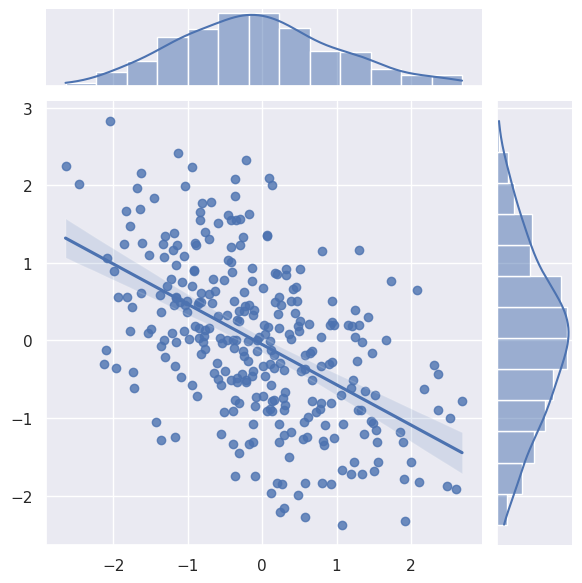

In [219]:
sns.jointplot(x=x, y=y, kind="reg");

## Task 6
<a name="task6"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* To your `df` Nest data frame, add a column with the unaccounted time (`Unaccounted Time / s`), which is the difference of program runtime, average neuron build time, minimal edge build time, minimal initialization time, presimulation time, and simulation time.  
(*I know this is technically not super correct, but it will do for our example.*)
* Plot a stacked bar plot of all these columns (except for program runtime) over the threads
* Tell me when you're done with status icon in BigBlueButton: 👍

In [220]:
cols = [
    'Avg. Neuron Build Time / s', 
    'Min. Edge Build Time / s', 
    'Min. Init. Time / s', 
    'Presim. Time / s', 
    'Sim. Time / s'
]
df["Unaccounted Time / s"] = df['Runtime Program / s']
for entry in cols:
    df["Unaccounted Time / s"] = df["Unaccounted Time / s"] - df[entry]

In [221]:
df[["Runtime Program / s", "Unaccounted Time / s", *cols]].head(2)

Runtime Program / s  Unaccounted Time / s  \
Threads                                              
8                     420.42                  2.09   
16                    202.15                  2.43   

         Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
Threads                                                         
8                              0.29                     88.12   
16                             0.28                     47.98   

         Min. Init. Time / s  Presim. Time / s  Sim. Time / s  
Threads                                                        
8                       1.14             17.26         311.52  
16                      0.70              7.95         142.81

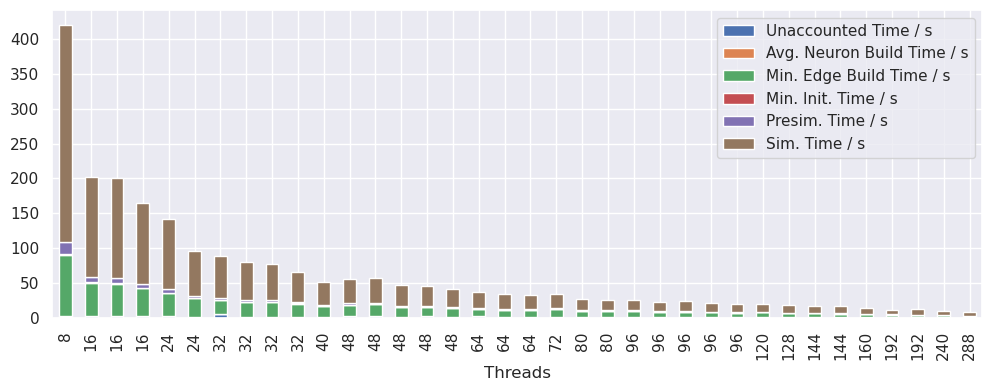

In [222]:
df[["Unaccounted Time / s", *cols]].plot(kind="bar", stacked=True, figsize=(12, 4));

* Make it relative to the total program run time
* **Slight complication**: Our threads as indexes are not unique; we need to find new unique indexes
* Could be anythig, but we use a **multi index**!

In [223]:
df_multind = df.set_index(["Nodes", "Tasks/Node", "Threads/Task"])
df_multind.head()

id  Runtime Program / s  Scale  Plastic  \
Nodes Tasks/Node Threads/Task                                            
1     2          4              5               420.42     10     True   
                 8              5               202.15     10     True   
      4          4              5               200.84     10     True   
2     2          4              5               164.16     10     True   
1     2          12             6               141.70     10     True   

                               Avg. Neuron Build Time / s  \
Nodes Tasks/Node Threads/Task                               
1     2          4                                   0.29   
                 8                                   0.28   
      4          4                                   0.15   
2     2          4                                   0.20   
1     2          12                                  0.30   

                               Min. Edge Build Time / s  \
Nodes Tasks/Node Threads/Task                             
1     2          4                                88.12   
                 8                                47.98   
      4          4                                46.03   
2     2          4                                40.03   
1     2          12                               32.93   

                               Max. Edge Build Time / s  Min. Init. Time / s  \
Nodes Tasks/Node Threads/Task                                                  
1     2          4                                88.18                 1.14   
                 8                                48.48                 0.70   
      4          4                                46.34                 0.70   
2     2          4                                41.09                 0.52   
1     2          12                               33.26                 0.62   

                               Max. Init. Time / s  Presim. Time / s  \
Nodes Tasks/Node Threads/Task                                          
1     2          4                            1.20             17.26   
                 8                            1.20              7.95   
      4          4                            1.01              7.87   
2     2          4                            1.58              6.08   
1     2          12                           0.95              5.41   

                               Sim. Time / s  Virt. Memory (Sum) / kB  \
Nodes Tasks/Node Threads/Task                                           
1     2          4                    311.52               46560664.0   
                 8                    142.81               47699384.0   
      4          4                    142.97               46903088.0   
2     2          4                    114.88               46937216.0   
1     2          12                   100.16               50148824.0   

                               Local Spike Counter (Sum)  Average Rate (Sum)  \
Nodes Tasks/Node Threads/Task                                                  
1     2          4                                825499                7.48   
                 8                                802865                7.03   
      4          4                                802865                7.03   
2     2          4                                802865                7.03   
1     2          12                               813743                7.27   

                               Number of Neurons  Number of Connections  \
Nodes Tasks/Node Threads/Task                                             
1     2          4                        112500             1265738500   
                 8                        112500             1265738500   
      4          4                        112500             1265738500   
2     2          4                        112500             1265738500   
1     2          12                       112500             1265738500   

     

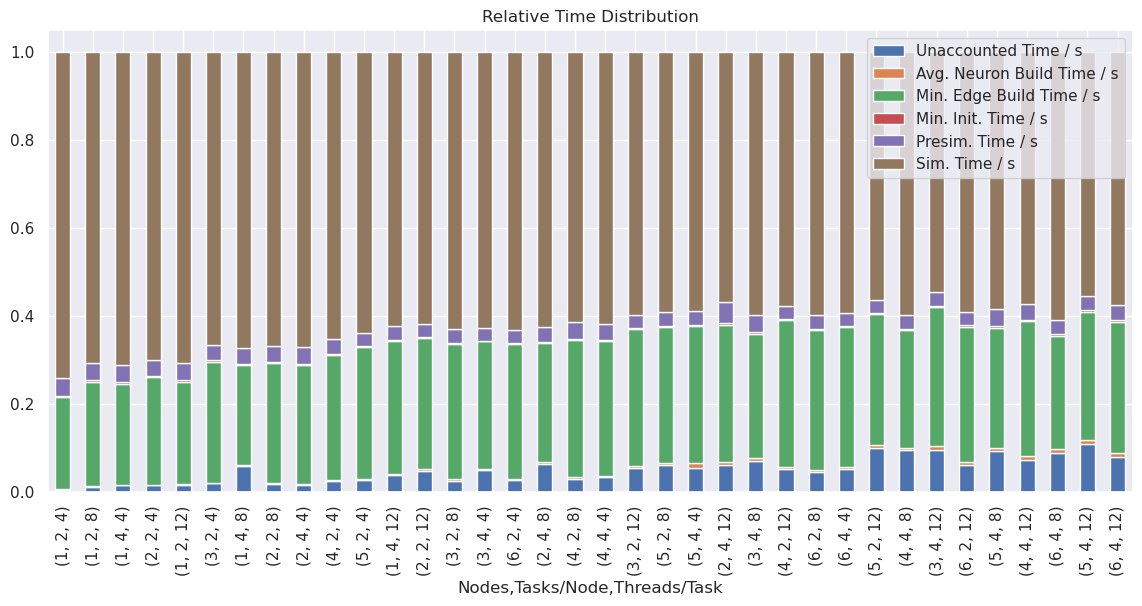

In [224]:
df_multind[["Unaccounted Time / s", *cols]]\
    .divide(df_multind["Runtime Program / s"], axis="index")\
    .plot(kind="bar", stacked=True, figsize=(14, 6), title="Relative Time Distribution");

## Next _Level_: Hierarchical Data

* `MultiIndex` only a first level
* More powerful:
    - Grouping: `.groupby()` ("Split-apply-combine", [API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html))
    - Pivoting: `.pivot_table()` ([API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html), [User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)); also `.pivot()` (specialized version of `.pivot_table()`, [API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html))

### Grouping

* Group a frame by common values of column(s)
* Use operations on this group
* Grouped frame is not _directly_ a new frame, but only through an applied operation

In [225]:
df.groupby("Nodes").groups

{1: [8, 16, 16, 24, 32, 48], 2: [16, 32, 32, 48, 64, 96], 3: [24, 48, 48, 72, 96, 144], 4: [32, 64, 64, 96, 128, 192], 5: [40, 80, 80, 120, 160, 240], 6: [48, 96, 96, 144, 192, 288]}

In [226]:
df.groupby("Nodes").get_group(4).head(3)

id  Nodes  Tasks/Node  Threads/Task  Runtime Program / s  Scale  \
Threads                                                                    
32        5      4           2             4                66.58     10   
64        5      4           2             8                34.09     10   
64        5      4           4             4                32.49     10   

         Plastic  Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
Threads                                                                  
32          True                        0.13                     18.86   
64          True                        0.14                     10.60   
64          True                        0.09                      9.98   

         Max. Edge Build Time / s  ...  Presim. Time / s  Sim. Time / s  \
Threads                            ...                                    
32                          19.65  ...              2.35          43.38   
64                          10.83  ...              1.25          20.96   
64                          10.31  ...              1.12          20.12   

         Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  \
Threads                                                       
32                    47361344.0                     821491   
64                    47074752.0                     818198   
64                    48081056.0                     818198   

         Average Rate (Sum)  Number of Neurons  Number of Connections  \
Threads                                                                 
32                     7.23             112500             1265738500   
64                     7.33             112500             1265738500   
64                     7.33             112500             1265738500   

         Min. Delay  Max. Delay  Unaccounted Time / s  
Threads                                                
32              1.5         1.5                  1.70  
64              1.5         1.5                  1.03  
64              1.5         1.5                  1.09  

[3 rows x 22 columns]

In [227]:
df.groupby("Nodes").mean()

id  Tasks/Node  Threads/Task  Runtime Program / s  Scale  \
Nodes                                                                   
1      5.333333         3.0           8.0           185.023333   10.0   
2      5.333333         3.0           8.0            73.601667   10.0   
3      5.333333         3.0           8.0            43.990000   10.0   
4      5.333333         3.0           8.0            31.225000   10.0   
5      5.333333         3.0           8.0            24.896667   10.0   
6      5.333333         3.0           8.0            20.215000   10.0   

       Plastic  Avg. Neuron Build Time / s  Min. Edge Build Time / s  \
Nodes                                                                  
1          1.0                    0.220000                 42.040000   
2          1.0                    0.168333                 19.628333   
3          1.0                    0.138333                 12.810000   
4          1.0                    0.116667                  9.325000   
5          1.0                    0.140000                  7.468333   
6          1.0                    0.106667                  6.165000   

       Max. Edge Build Time / s  Min. Init. Time / s  ...  Presim. Time / s  \
Nodes                                                 ...                     
1                     42.838333             0.583333  ...          7.226667   
2                     20.313333             0.191667  ...          2.725000   
3                     13.305000             0.135000  ...          1.426667   
4                      9.740000             0.088333  ...          1.066667   
5                      7.790000             0.070000  ...          0.771667   
6                      6.406667             0.051667  ...          0.630000   

       Sim. Time / s  Virt. Memory (Sum) / kB  Local Spike Counter (Sum)  \
Nodes                                                                      
1         132.061667             4.806585e+07              816298.000000   
2          48.901667             4.975288e+07              818151.000000   
3          27.735000             5.511165e+07              820465.666667   
4          19.353333             5.325783e+07              819558.166667   
5          14.950000             6.075634e+07              815307.666667   
6          12.271667             6.060652e+07              815456.333333   

       Average Rate (Sum)  Number of Neurons  Number of Connections  \
Nodes                                                                 
1                7.215000           112500.0           1.265738e+09   
2                7.210000           112500.0           1.265738e+09   
3                7.253333           112500.0           1.265738e+09   
4                7.288333           112500.0           1.265738e+09   
5                7.225000           112500.0           1.265738e+09   
6                7.201667           112500.0           1.265738e+09   

       Min. Delay  Max. Delay  Unaccounted Time / s  
Nodes                                                
1             1.5         1.5              2.891667  
2             1.5         1.5              1.986667  
3             1.5         1.5              1.745000  
4             1.5         1.5              1.275000  
5             1.5         1.5              1.496667  
6             1.5         1.5              0.990000  

[6 rows x 21 columns]

### Pivoting

* Combine categorically-similar columns
* Creates hierarchical index
* Respected during plotting with Pandas!
* A pivot table has three *layers*; if confused, think about the related questions
    - `index`: »What's on the `x` axis?«
    - `values`: »What value do I want to plot [on the `y` axis]?«
    - `columns`: »What categories do I want [to be in the legend]?«
* All can be populated from base data frame
* Might be aggregated, if needed

In [228]:
df_demo["H"] = [(-1)**n for n in range(5)]

In [229]:
df_pivot = df_demo.pivot_table(
    index="F",
    values="E2",
    columns="H"
)
df_pivot

H                -1         1
F                            
-3.918282       NaN  7.389056
-2.504068       NaN  1.700594
-1.918282       NaN  0.515929
-0.213769  0.972652       NaN
 0.518282  2.952492       NaN

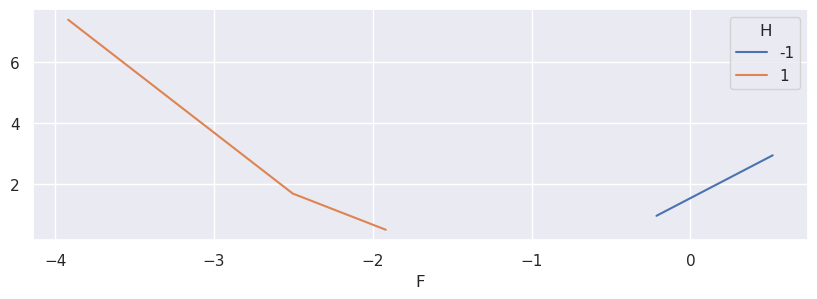

In [230]:
df_pivot.plot(figsize=(10,3));

## Task 7
<a name="task7"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Create a pivot table based on the Nest `df` data frame
* Let the `x` axis show the number of nodes; display the values of the simulation time `"Sim. Time / s"` for the tasks per node and threads per task configurations
* Please plot a bar plot
* Tell me when you're done with status icon in BigBlueButton: 👍

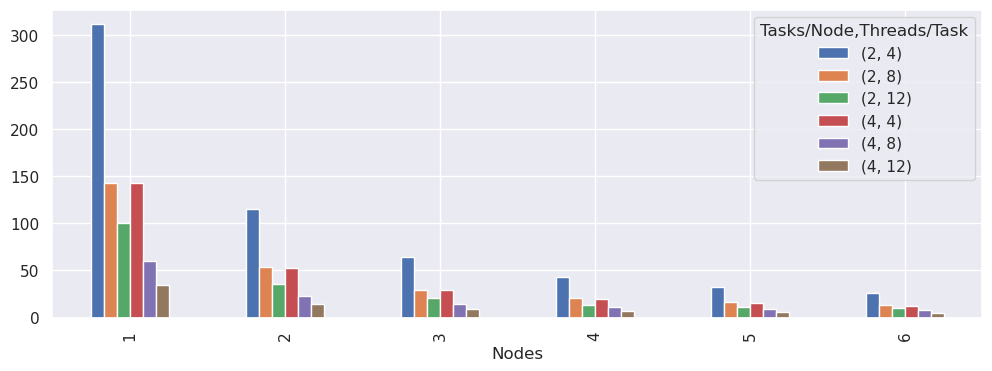

In [231]:
df.pivot_table(
    index="Nodes",
    columns=["Tasks/Node", "Threads/Task"],
    values="Sim. Time / s",
).plot(kind="bar", figsize=(12, 4));

## Task 7B (like <em>B</em>onus)
<a name="task7b"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

- Same pivot table as before (that is, `x` with nodes, and columns for Tasks/Node and Threads/Task)
- But now, use `Sim. Time / s` and `Presim. Time / s` as values to show
- Show them as a **stack** of those two values inside the pivot table
- Use Panda's functionality as much as possible!

## Pandas 2

* [Pandas 2.0](https://pandas.pydata.org/docs/dev/whatsnew/v2.0.0.html) was released in April 2023
* Only limited deprecations (i.e. _an upgrade is probably safe_)
* Key new feature: Apache Arrow support (via PyArrow)
* Fine-grained installation options `python3 -m pip install 'pandas[performance, excel]'`

* However: Currently [10/2024] a dependency mismatch in default version

* Get a reasonably large data source (larger would be better, though)
* Example: [Train stations as provided by Deutsche Bahn](https://web.archive.org/web/20231208211825/https://download-data.deutschebahn.com/static/datasets/stationsdaten/DBSuS-Uebersicht_Bahnhoefe-Stand2020-03.csv)

In [232]:
data_db = 'db-bahnhoefe.csv'  # source: https://web.archive.org/web/20231208211825/https://download-data.deutschebahn.com/static/datasets/stationsdaten/DBSuS-Uebersicht_Bahnhoefe-Stand2020-03.csv

In [233]:
%timeit pd.read_csv(data_db, sep=';')

10 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [234]:
import pyarrow
print(pyarrow.__version__)

ModuleNotFoundError: No module named 'pyarrow'

In [ ]:
pd.read_csv(data_db, sep=';', engine='pyarrow', dtype_backend='pyarrow')

## Polars

In [ ]:
import polars as ps
%timeit ps.read_csv(data_db, separator=';')

## Large Data & Mangling

* Pandas can read data directly in `tar` form
* Pandas can read data directly from online resource
* Let's combine that to an advanced task!
* It works also with the PyArrow backend (remember to download the online resource when testing; there is no cache!)

## Task 8 (Super Bonus)
<a name="task8"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

* Create bar chart of top 10 actors (on `x`) and average ratings of their top movies (`y`) based on IMDb data (only if they play in at least two movies)

* IMDb provides data sets at [datasets.imdbws.com](https://datasets.imdbws.com)
* Can directly be loaded like
```python
pd.read_table('https://datasets.imdbws.com/dataset.tsv.gz', sep="\t", low_memory=False, na_values=["\\N","nan"])
```
* Needed:
  * `name.basics.tsv.gz` (for names of actors and movies they are known for)
  * `title.ratings.tsv.gz` (for ratings of titles)
* Strategy _suggestions_:
  * Use `df.apply()` with custom function
  * Custom function: Compute average rating and determine if this entry is eligible for plotting (this _can_ be done at once, but does not need to be)
  * Average rating: Look up title IDs as listed in `knownForTitles` in titles dataframe

```python
df_names = pd.read_table('imdb-data/name.basics.tsv.gz', sep="\t", low_memory=False, na_values=["\\N","nan"])
df_ratings = pd.read_table('https://datasets.imdbws.com/title.ratings.tsv.gz', sep="\t", low_memory=False, na_values=["\\N","nan"])
                           
df_names_i = df_names.set_index('nconst')
df_ratings_i = df_ratings.set_index('tconst')
                           
df_names_i = pd.concat(
    [
        df_names_i, 
        df_names_i.apply(lambda line: valid_and_avg_rating(line), axis=1, result_type='expand')
    ]
    , axis=1
)
df_names_i[df_names_i['toPlot'] == True].sort_values('avgRating', ascending=False).iloc[0:10].reset_index().set_index('primaryName')['avgRating'].plot(kind='bar')
```

```python
def valid_and_avg_rating(row):
    rating = 0
    ntitles = 0
    _titles = row['knownForTitles']
    _professions = row['primaryProfession']
    if not isinstance(_titles, str):
        _titles = str(_titles)
    if not isinstance(_professions, str):
        _professions = str(_professions)
    titles = _titles.split(',')
    professions = _professions.split(',')
    for title in titles:
        if title in df_ratings_i.index:
            rating += df_ratings_i.loc[title]['averageRating']
            ntitles += 1
    if ntitles > 0:
        plot = False
        if ntitles > 2:
            if 'actor' in professions:
                plot = True
        return {'toPlot': plot, 'avgRating': rating / ntitles}
    else:
        return {'toPlot': False, 'avgRating': pd.NA}

```

## Task 8B (<em>B</em>onuseption)
<a name="task8b"></a>
<span class="task" style="padding: 2px 8px; color: white; background-color: #b9d25f; float: right; text-weight: bolder;">TASK</em></span>

All of the following are ideas for unique sub-tasks, which can be done individually
* In addition to Task 8, restrict the top titles to those with more than 10000 votes
* For 30 top-rated actors, plot rating vs. age
* For 30 top-rated actors, plot rating vs. average runtime of the known-for-titles (using `title.basics.tsv.gz`)

## Random Features Not Shown

This are all links:
* [`df.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
* [`df.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
* [`df.boxplot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
* [`pd.read_sql_query("SELECT * FROM purchases", con)`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html)
* [`df.duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) and [`df.drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
* Aliases for [categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical)
* Working with [time](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries)
  - `ts.tz_convert`
  - `pd.period_range()`
  - `pd.period_range().asfreq()`

## Conclusion

* Pandas works with and on **data frames**, which are central
* **Slice** frames to your likings
* **Plot** frames
    - Together with Matplotlib, Seaborn, others
* **Pivot** tables are next level greatness
* Remember: ***Pandas as early as possible!***
* Thanks for being here! 😍

<span class="feedback">Feedback to <a href="mailto:a.herten@fz-juelich.de">a.herten@fz-juelich.de</a></span>

_Next slide: Further reading_

## Further Reading

* [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
* [Matplotlib and LaTeX Plots](http://sbillaudelle.de/2015/02/23/seamlessly-embedding-matplotlib-output-into-latex.html)
* towardsdatascience.com:
    * [Pandas DataFrame: A lightweight Intro](https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96)
    * [Introduction to Data Visualization in Python](https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed)
    * [Basic Time Series Manipulation with Pandas](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea)
    * [An Introduction to Scikit Learn: The Gold Standard of Python Machine Learning](https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab)
    * [Mapping with Matplotlib, Pandas, Geopandas and Basemap in Python](https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac)
    * [Whats new in Pandas 2](https://towardsdatascience.com/pandas-2-0-a-game-changer-for-data-scientists-3cd281fcc4b4)